#**Data Mining and Visualization Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Score,tokenization,vectorization and splitting Libraries**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

#**Models Used**

In [12]:
from sklearn.naive_bayes import MultinomialNB  # 83.7% efficency
from sklearn.ensemble import RandomForestClassifier # 82.5% efficency
from sklearn.tree import DecisionTreeClassifier    # 83% efficency

#**Importing The Data**

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleandata.csv')
df = df.drop(['Tweets','Date'],axis=1)
pos_neg_data  = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/LabeledText.xlsx", engine="openpyxl")
df1=df.copy(deep=True)

#**User Defined Functions**

In [14]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def splitsingle(data):
  for tweet in data:
    x=tweet
    if(len(str(x).split())>1):
      df.drop(df[df['Cleaned_Tweets']==tweet].index,inplace=True)

def removesome(data):
    x = data.split()
    new_str = ""
    for i in x:
      if i[0]=='#':
        new_str = new_str +' '+ i[1:len(i)]
      else :
        new_str = new_str +' '+ i
    return new_str

#**Data Spliting and cleaning**

In [15]:
for data in pos_neg_data['Caption']:
   trimmed_data = removesome(data)
   pos_neg_data['Caption'].replace(data,trimmed_data,inplace=True)

labels = {
      'positive':1.0,
      'negative':0.0,
}

pos_neg_data=pos_neg_data[pos_neg_data['LABEL']!='neutral']
pos_neg_data.replace(labels,inplace=True)

x = np.array(pos_neg_data['Caption'])
y = np.array(pos_neg_data['LABEL'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

<ipython-input-15-56923257a819>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_neg_data.replace(labels,inplace=True)


#**Vectorizing(Tokenizing) the Data**

In [16]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

x_train_tfidf = count_vect.fit_transform(x_train)
x_train_tfidf = tfidf_transformer.fit_transform(x_train_tfidf)

x_test_tfidf = count_vect.transform(x_test)
x_test_tfidf = tfidf_transformer.transform(x_test_tfidf)

print(x_train_tfidf.shape ,x_test_tfidf.shape)

(2478, 10798) (620, 10798)


#**Selecting and testing the Model for accuracy**

In [17]:
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

predicted = model.predict(x_test_tfidf)
score = accuracy_score(y_test,predicted)
print("Score:- ",score*100,"%")

Score:-  83.70967741935483 %


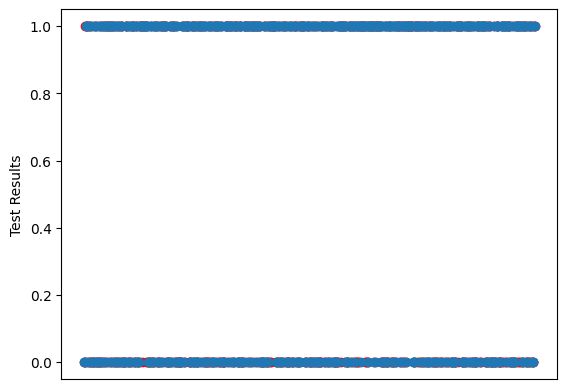

In [18]:
plt.scatter(x_test,y_test,c="red")
plt.scatter(x_test,predicted)
plt.xlabel('Predictions')
plt.ylabel('Test Results')
plt.gca().axes.get_xaxis().set_visible(False) # Because the features cannot be seen in this graph
plt.show()